In [1]:
from stats import *
import pandas as pd

In [2]:
x= pd.read_csv("labels/labels_1.csv")
x

,run,trial,global time,run time,morph level,couple,response,response time
0,1,1,35172,847,15,4,1,558.0
1,1,2,40374,6049,95,1,1,846.0
2,1,3,45376,11051,75,9,1,843.0
3,1,4,49378,15053,5,2,0,NaN
4,1,5,55281,20956,45,7,1,888.0
...,...,...,...,...,...,...,...,...
360,4,86,2246383,453129,35,4,1,695.0
361,4,87,2250185,456931,85,5,1,800.0
362,4,88,2255587,462333,95,7,1,612.0
363,4,89,2259489,466235,25,6,1,507.0


In [3]:
cur_mean, cur_std = compute_morph_scores(x)

print(cur_mean)
print(cur_std)

             response  response time
morph level                         
5            0.820513     818.343750
15           0.787879     819.807692
25           0.812500    1138.615385
35           0.513514     946.842105
45           0.700000    1020.714286
55           0.675000     811.851852
65           0.837838     829.000000
75           0.909091     855.233333
85           1.000000     831.750000
95           1.000000     743.894737
             response  response time
morph level                         
5            0.062254      43.624206
15           0.072268      40.487245
25           0.070102     144.838592
35           0.083303      83.518951
45           0.073380     125.109425
55           0.075000      40.336558
65           0.061433      72.708637
75           0.050820      96.235210
85           0.000000      89.565923
95           0.000000      36.810920


In [4]:
_, fitted_curve = fit_sigmoid(cur_mean)

inflexion_point = find_inflexion(fitted_curve)


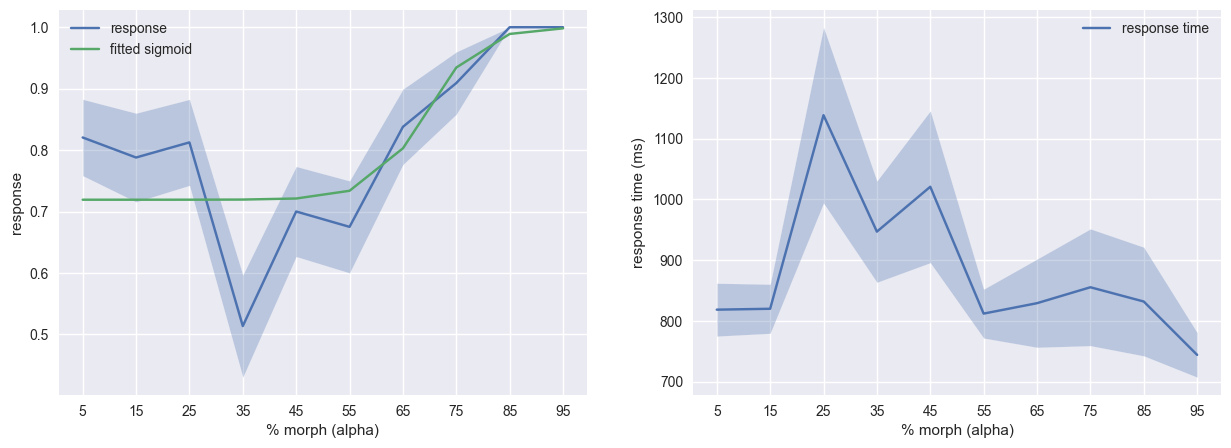

In [5]:

plot_behavioral_data(cur_mean, cur_std, sigmoid_curve=fitted_curve, inflexion_point=inflexion_point)


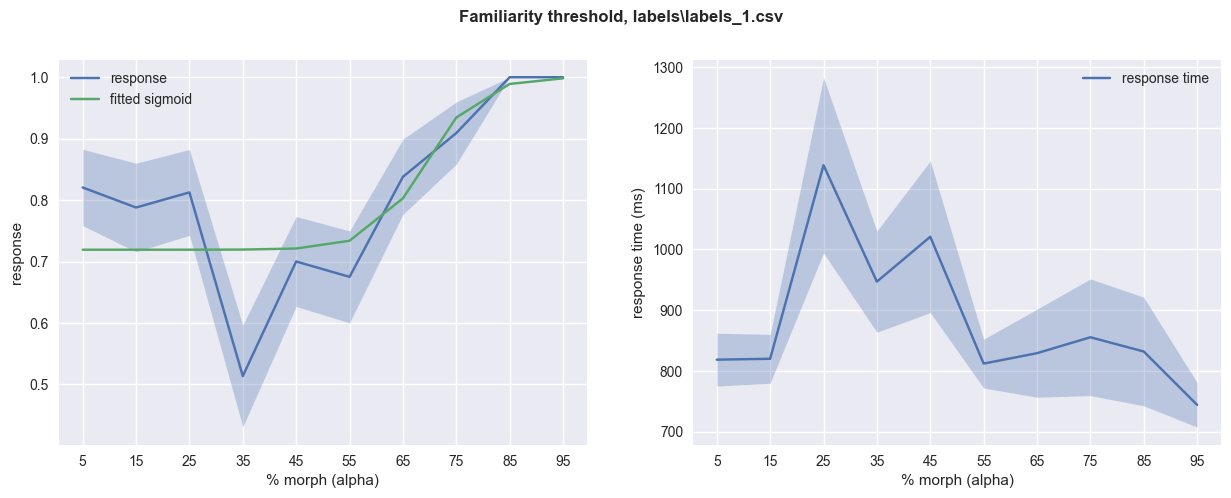

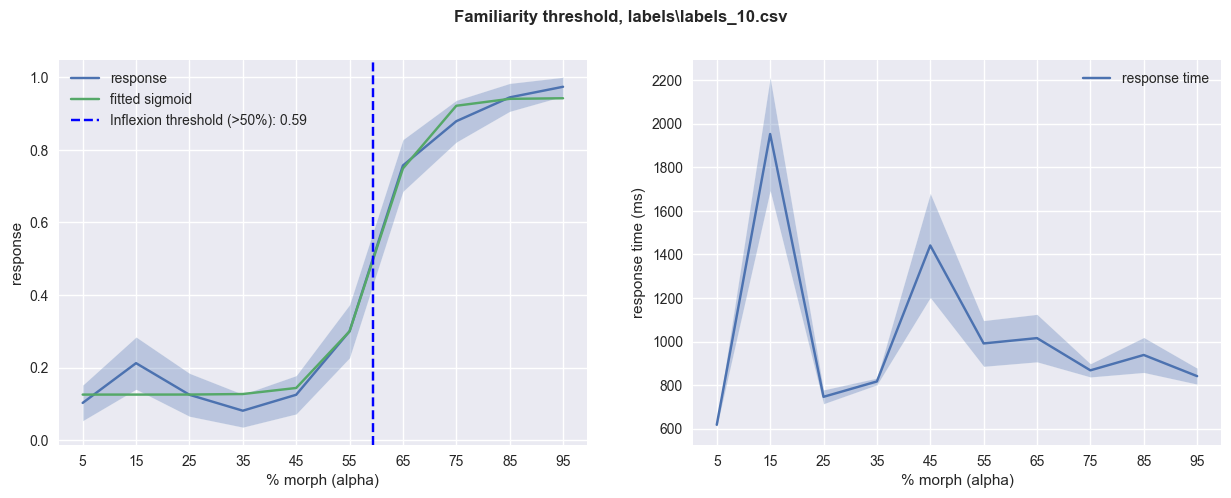

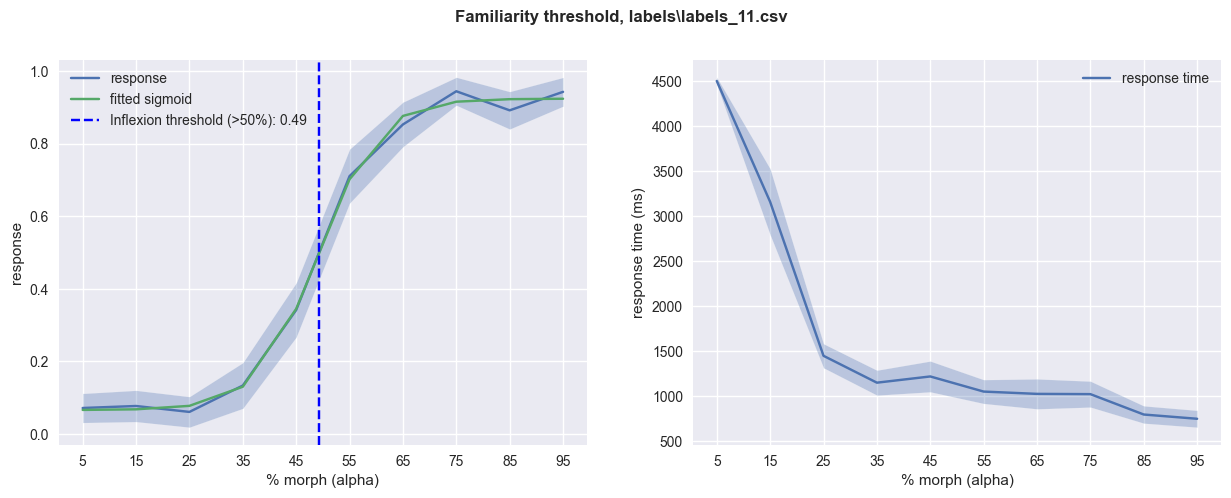

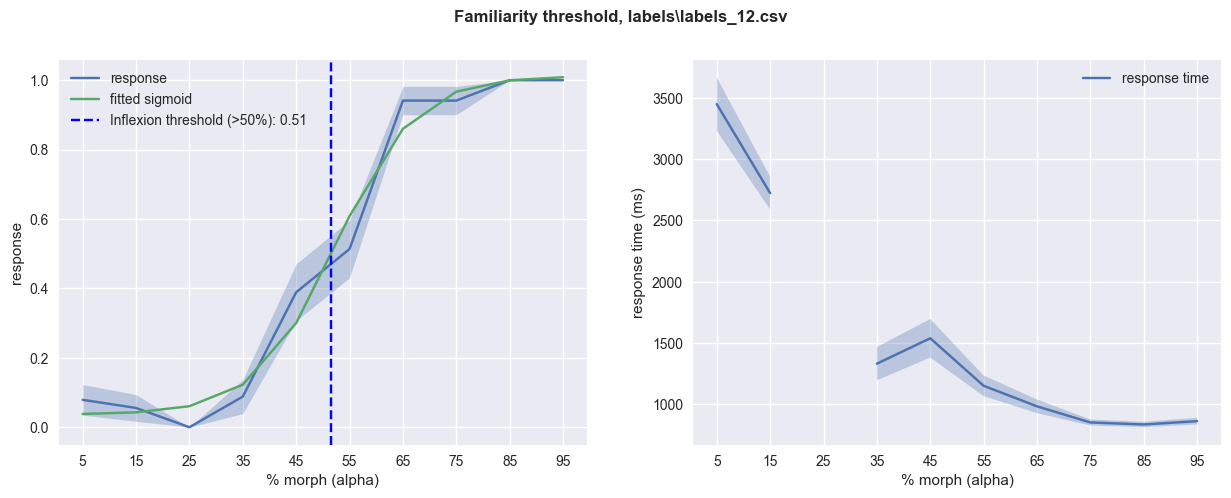

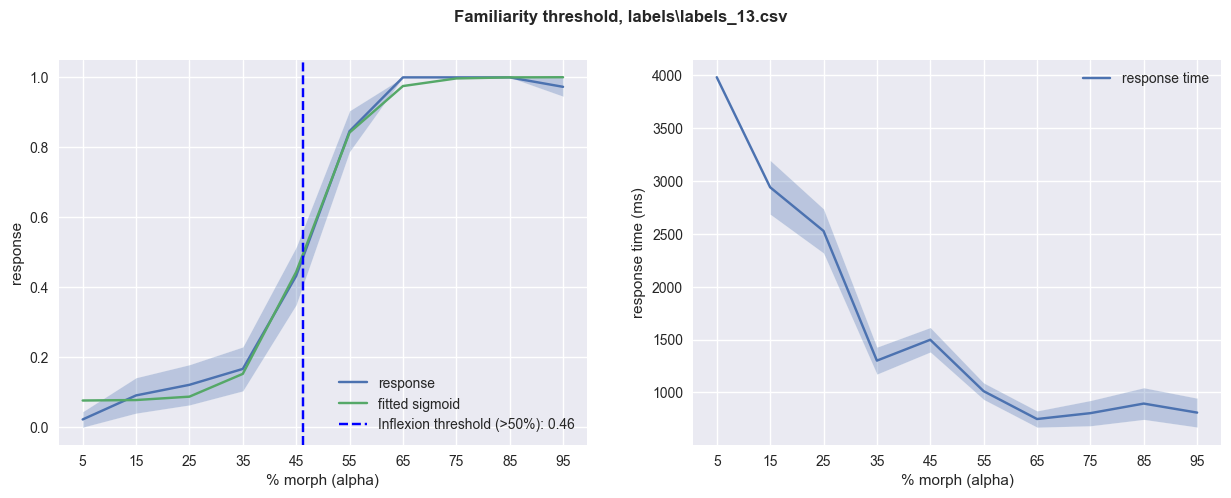

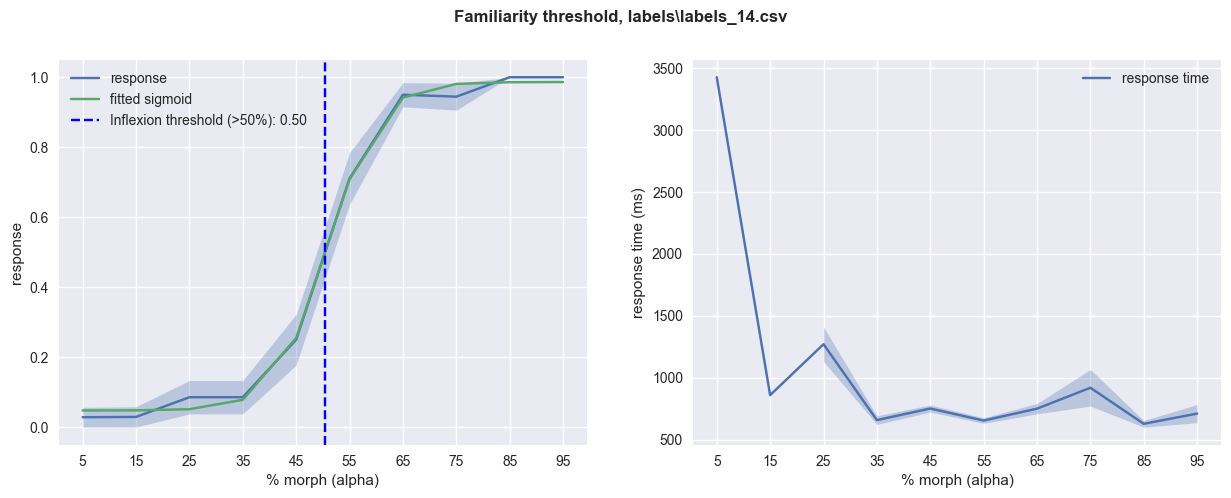

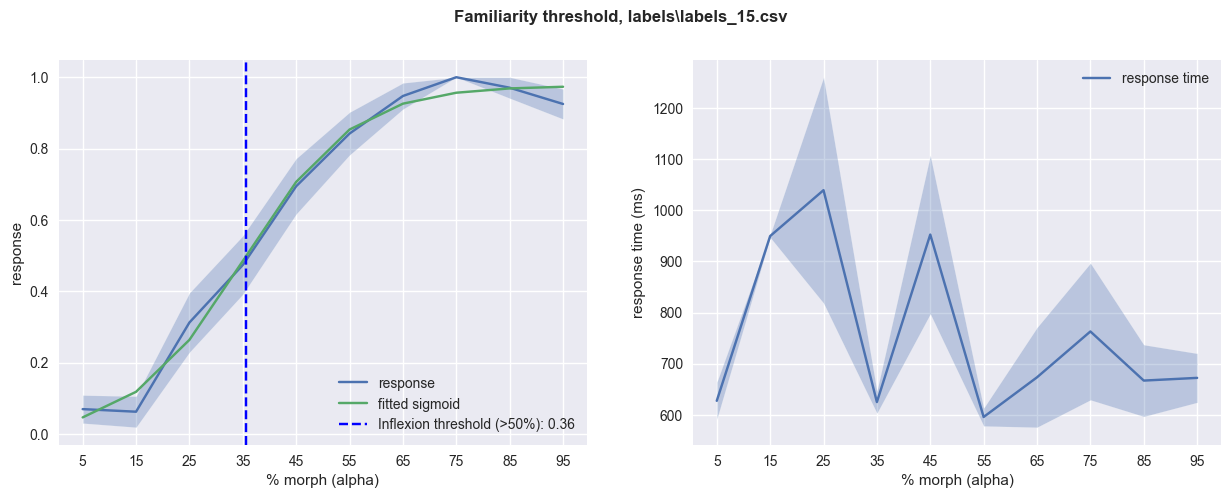

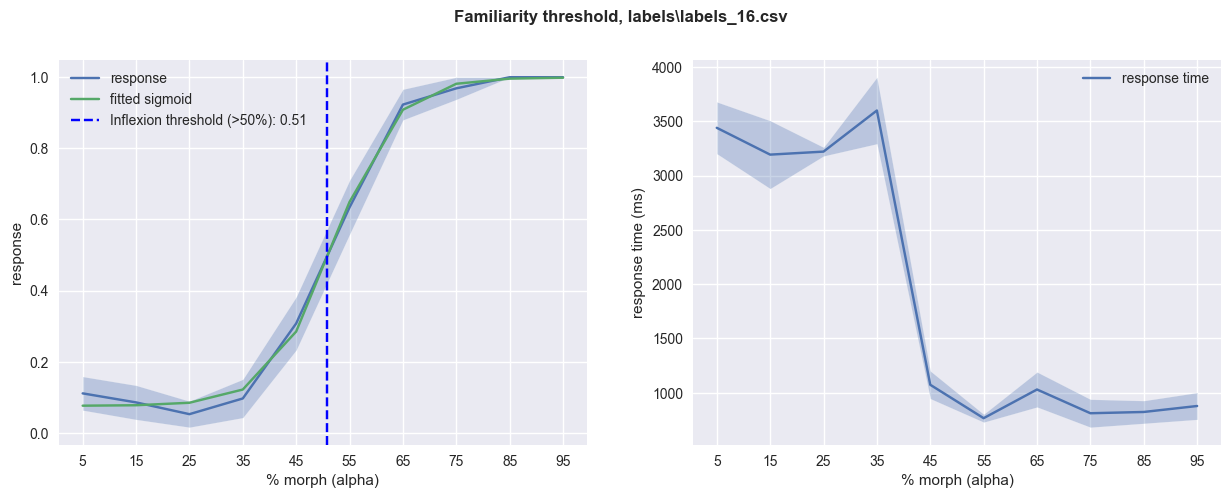

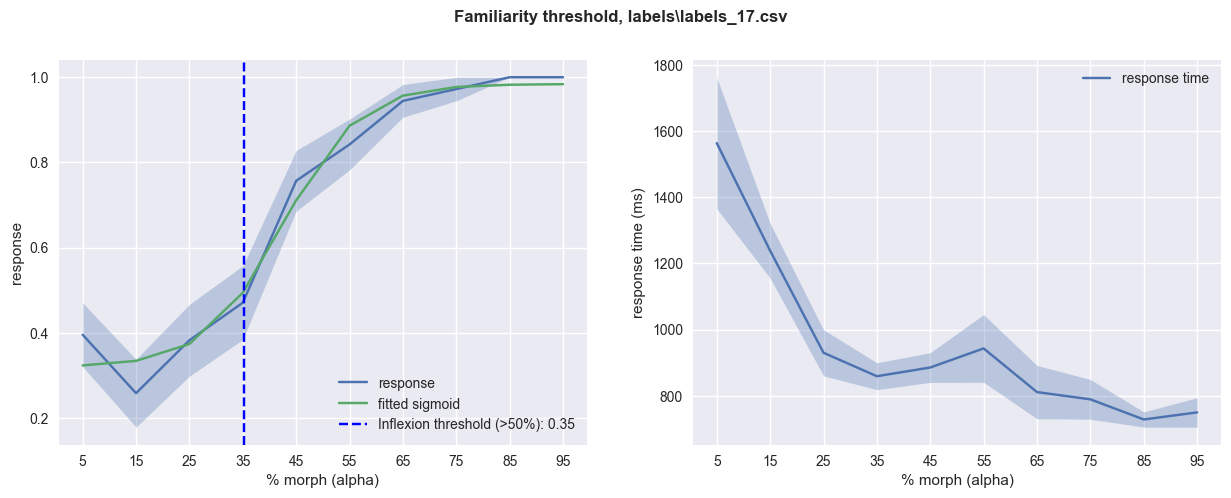

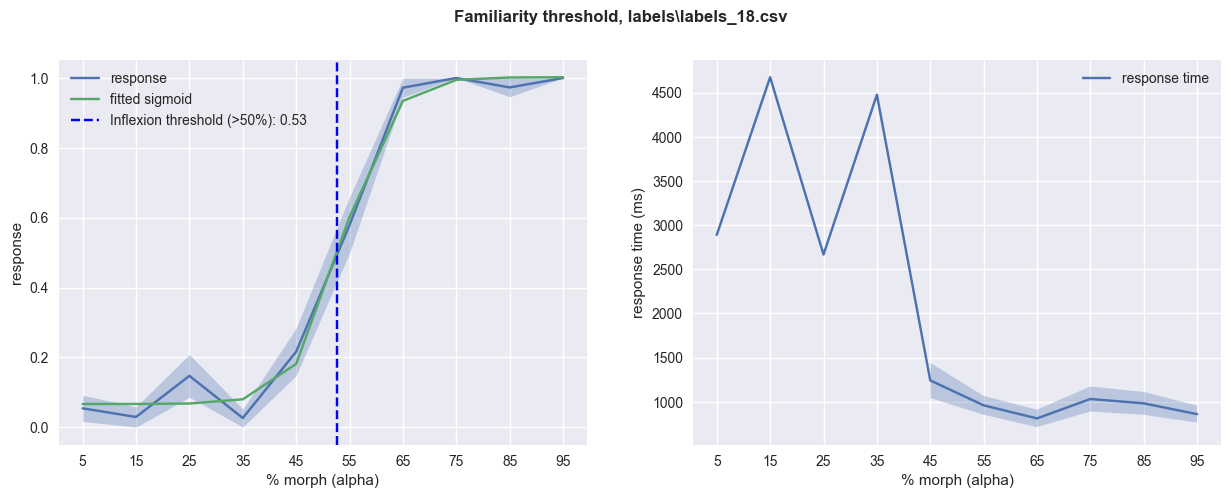

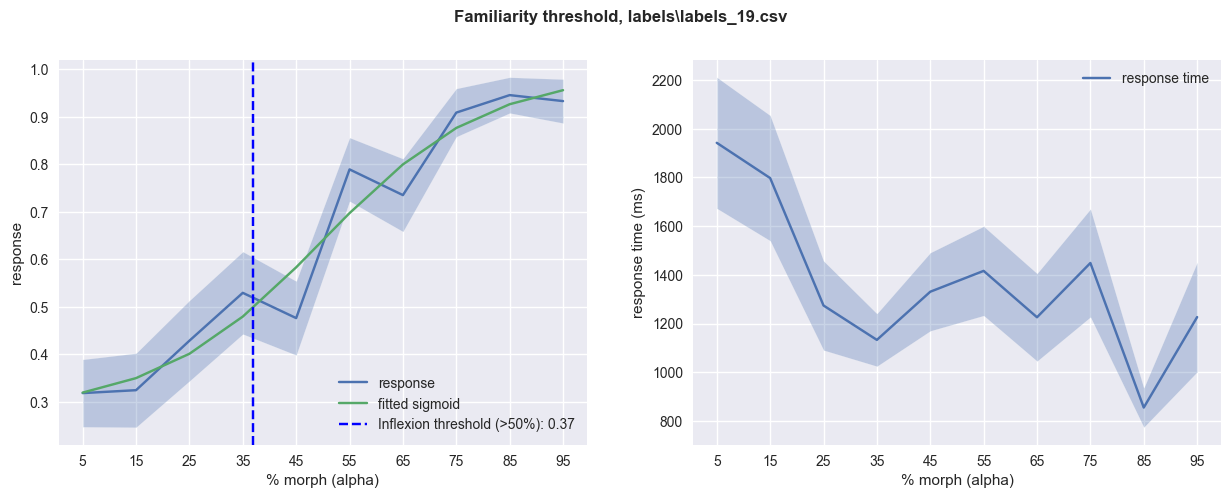

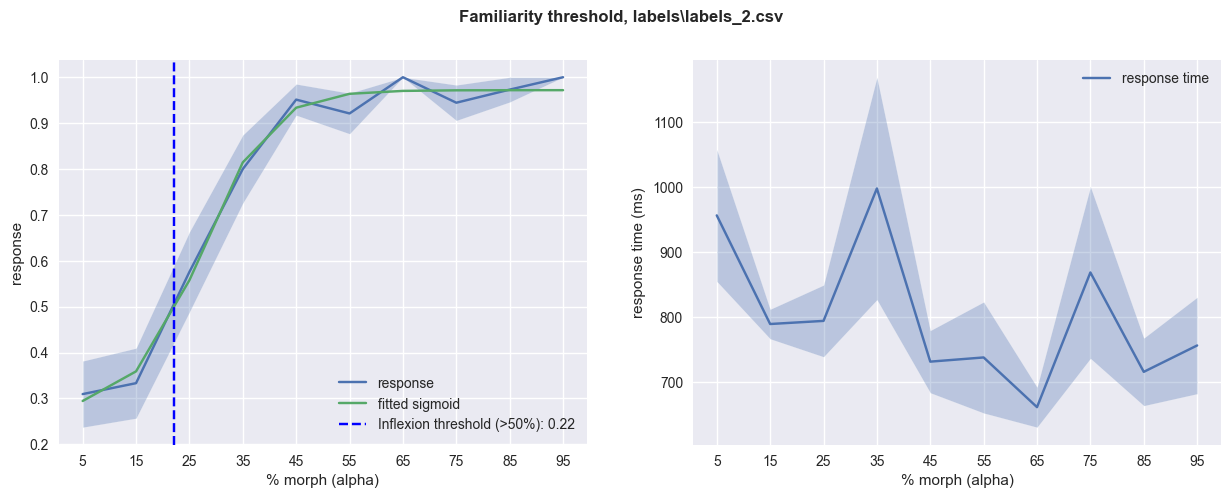

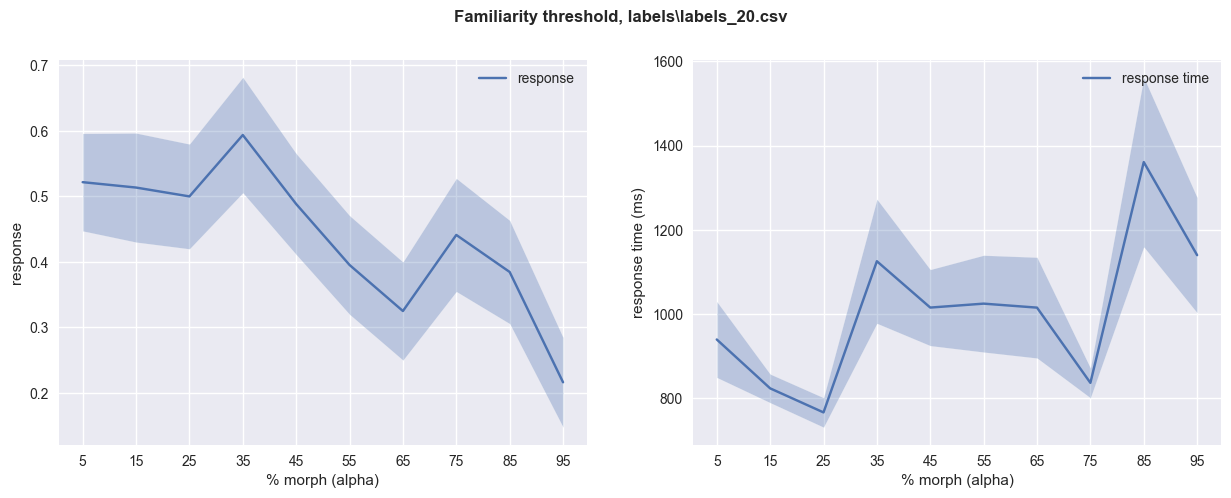

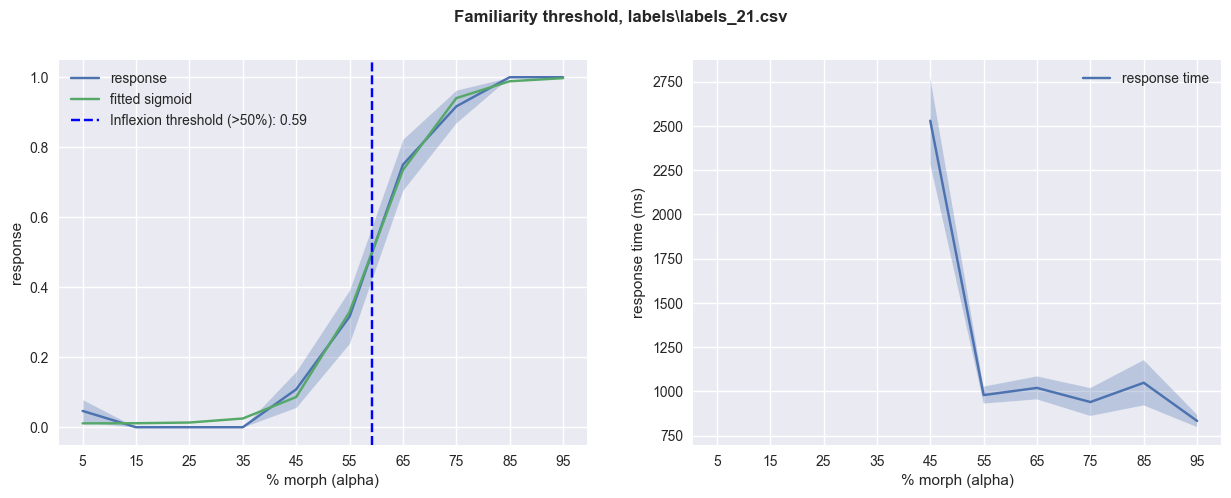

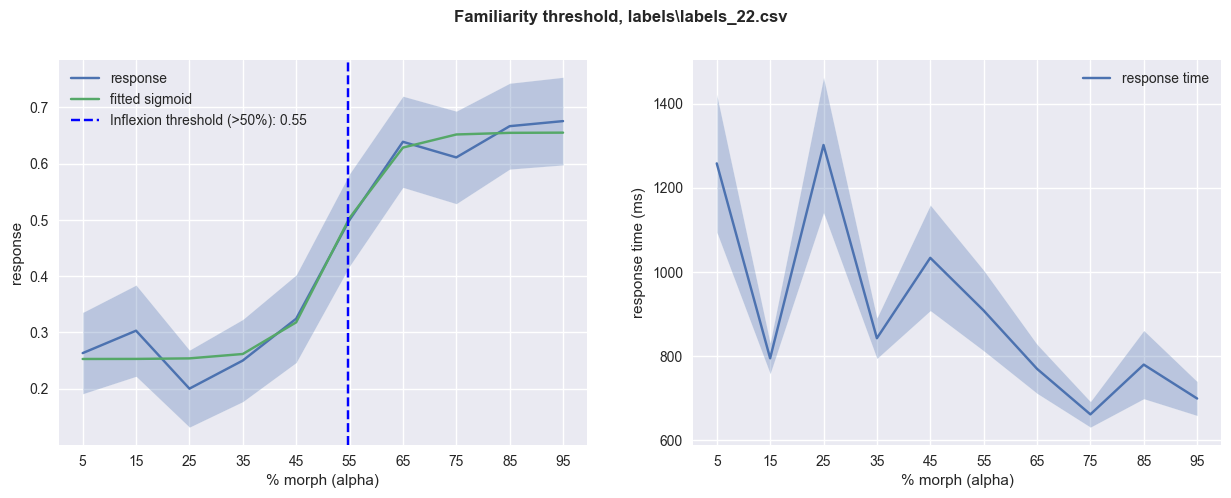

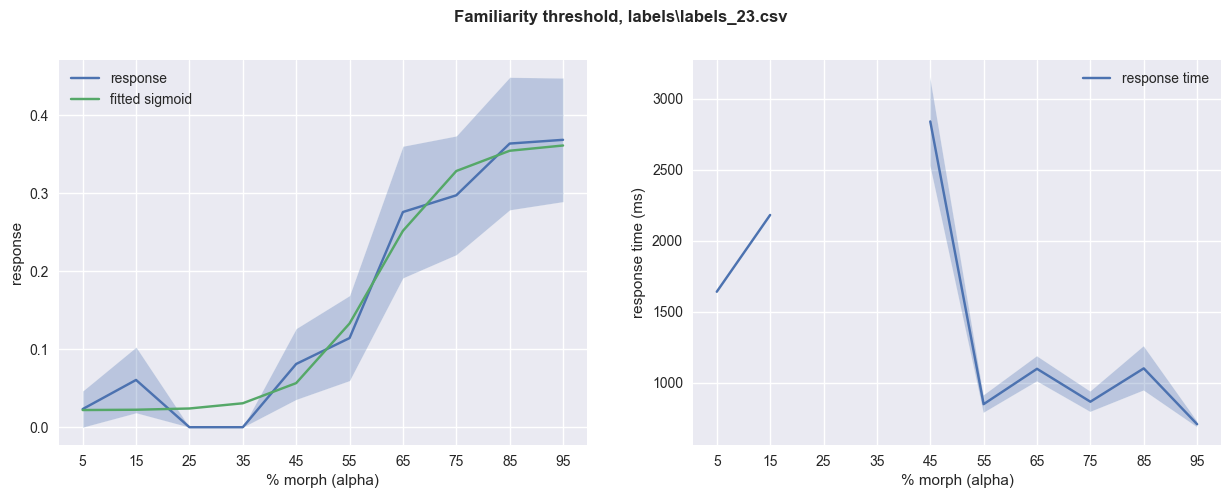

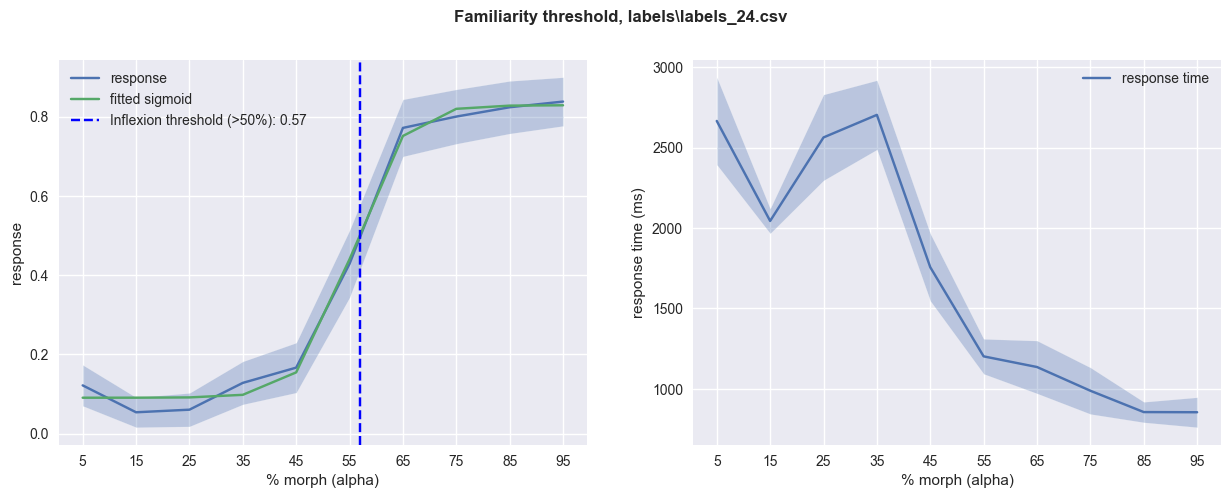

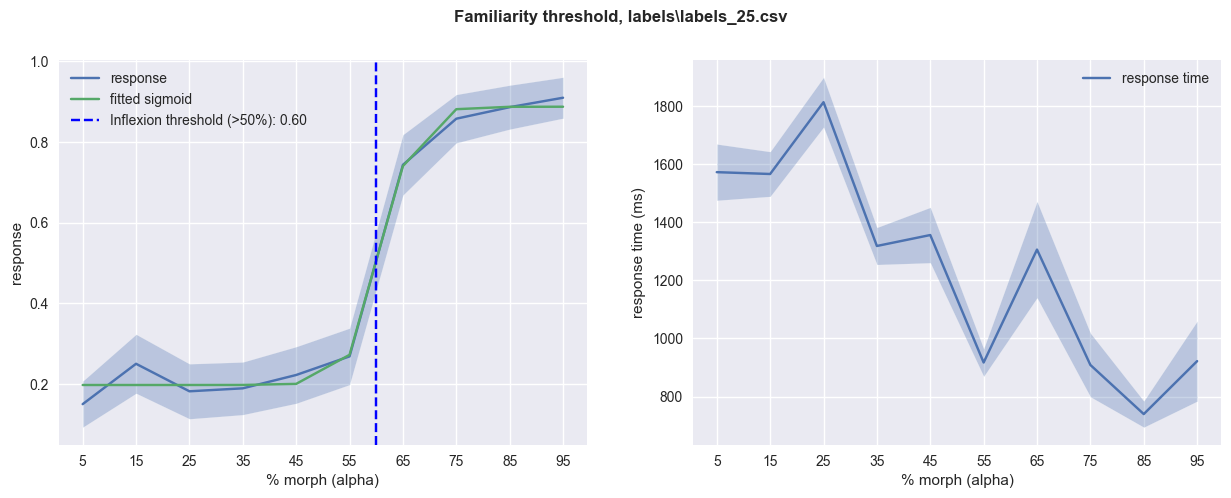

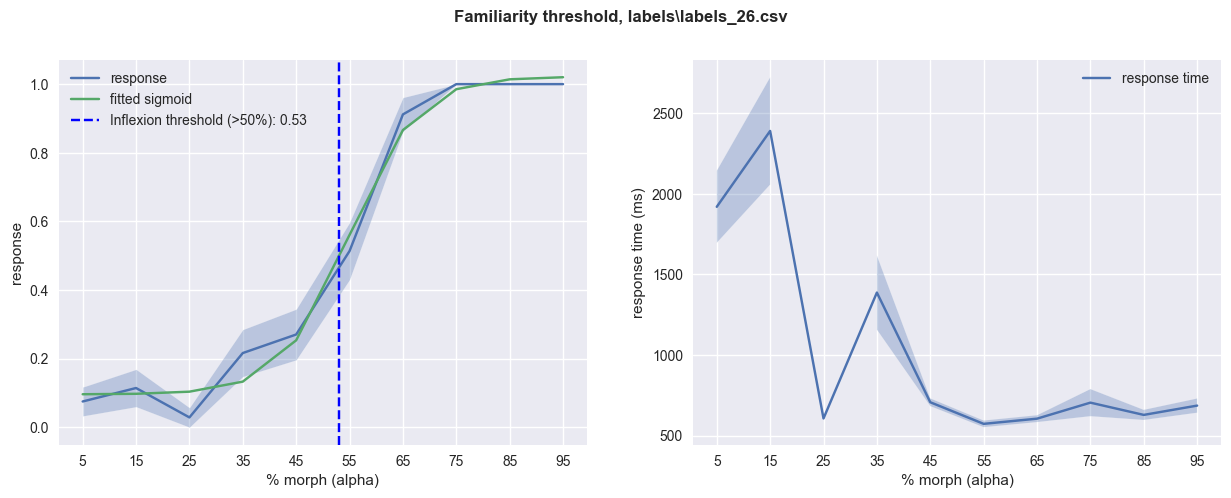

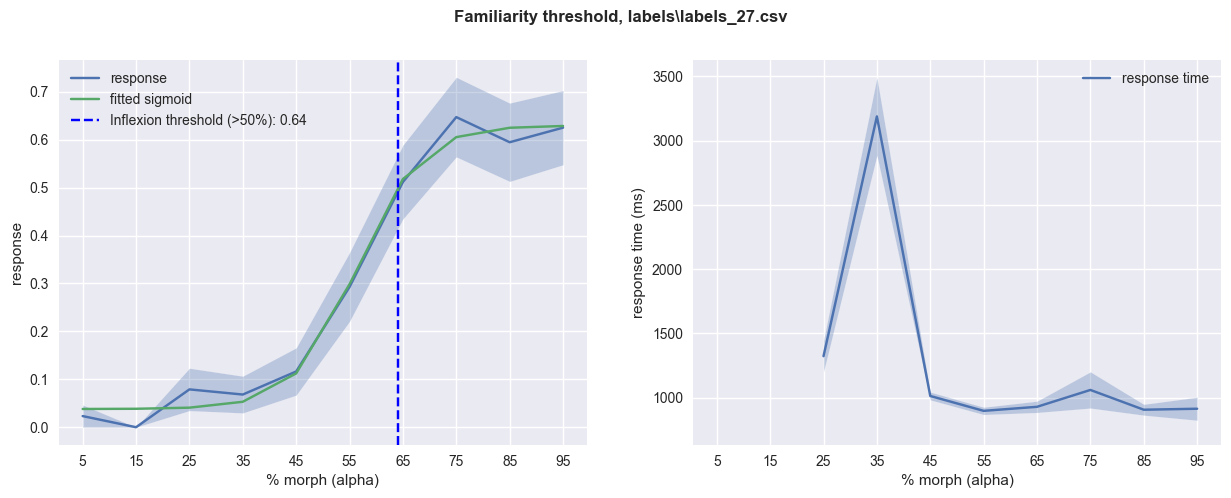

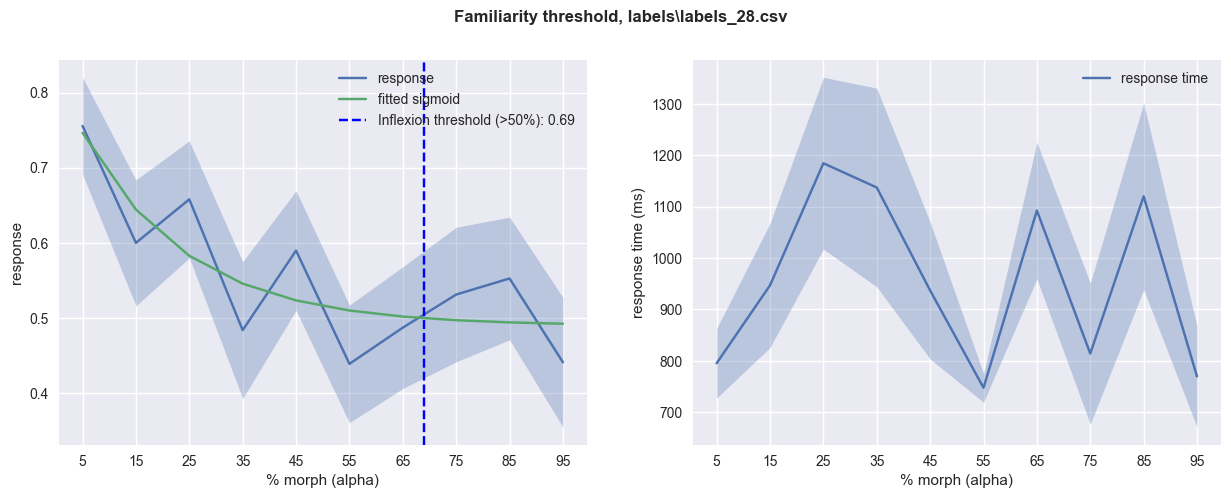

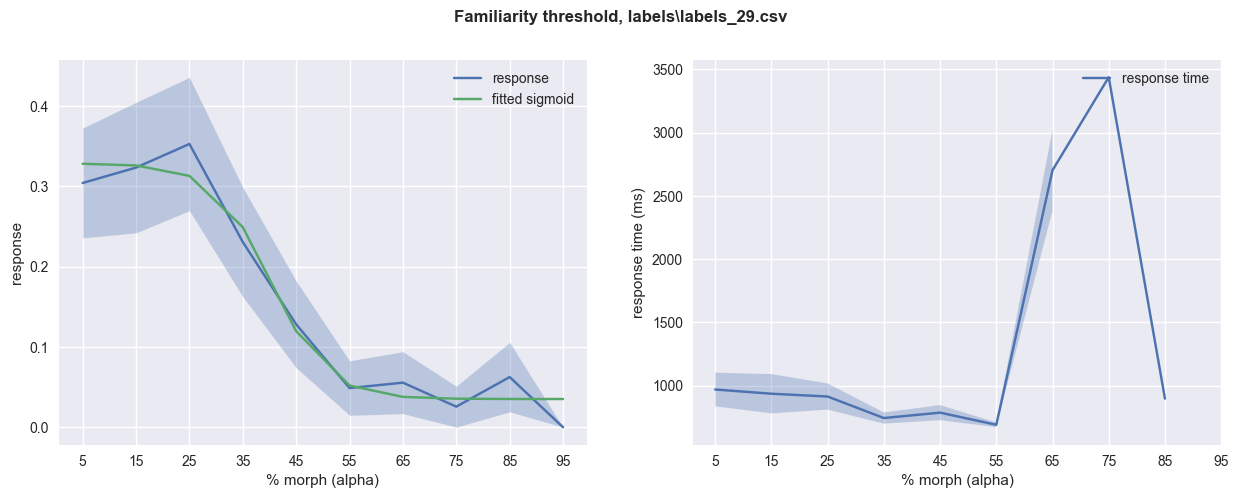

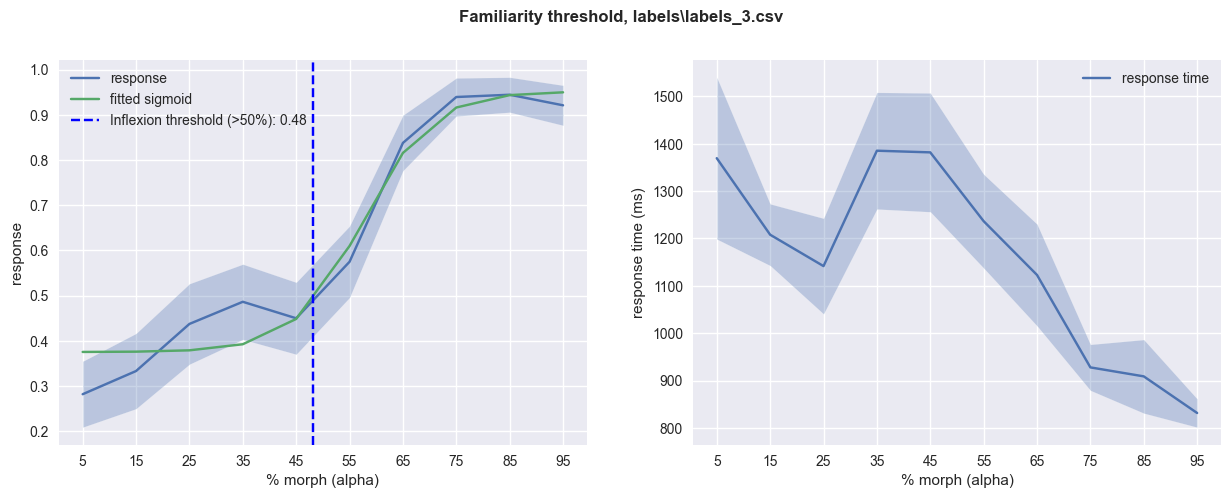

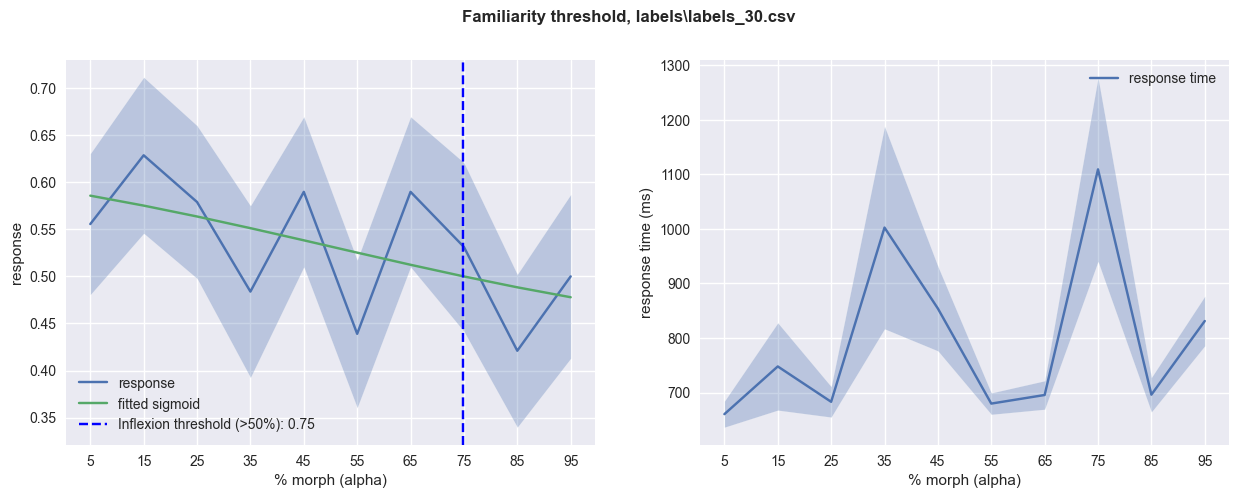

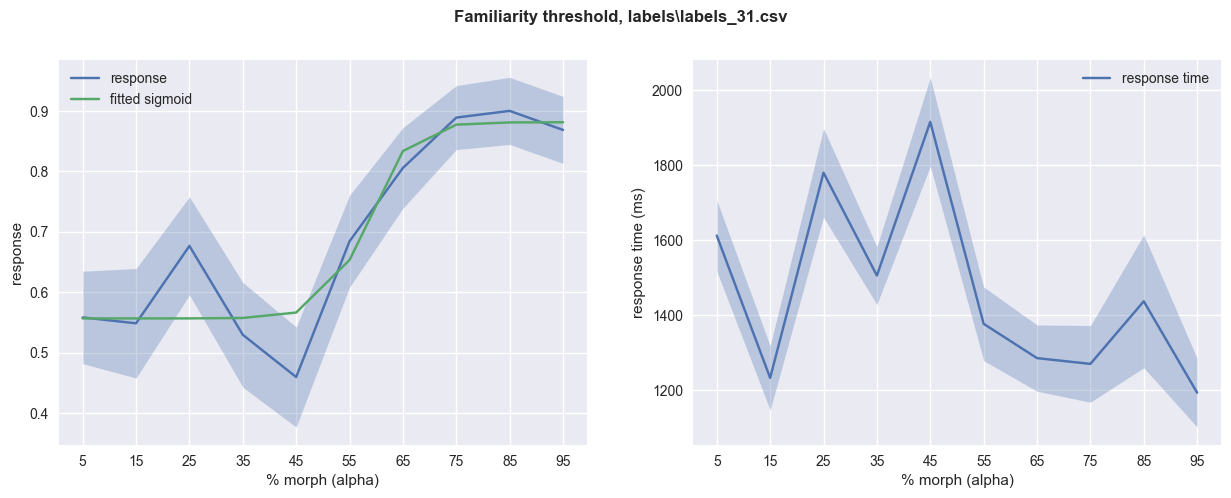

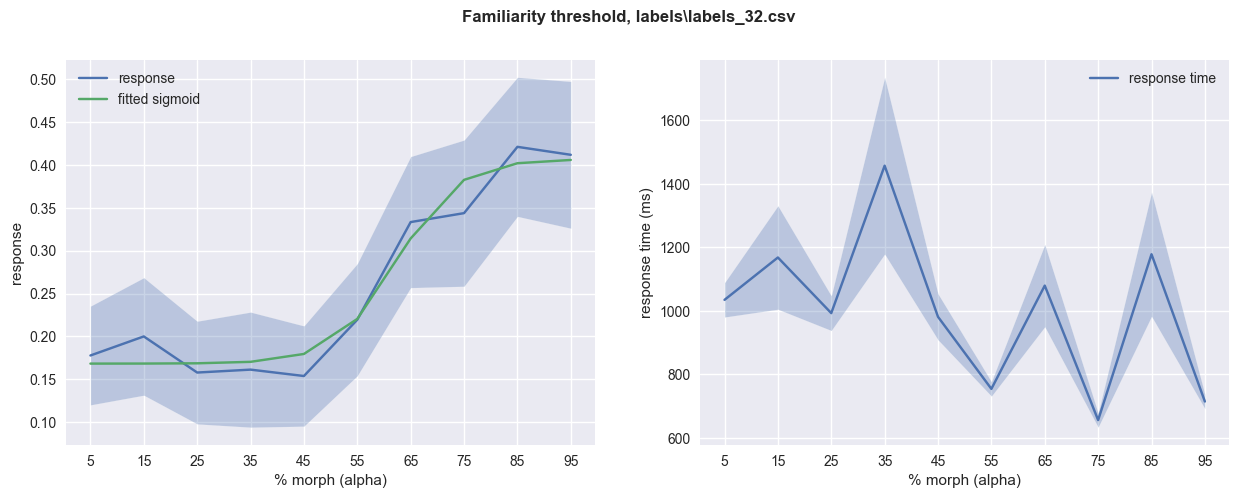

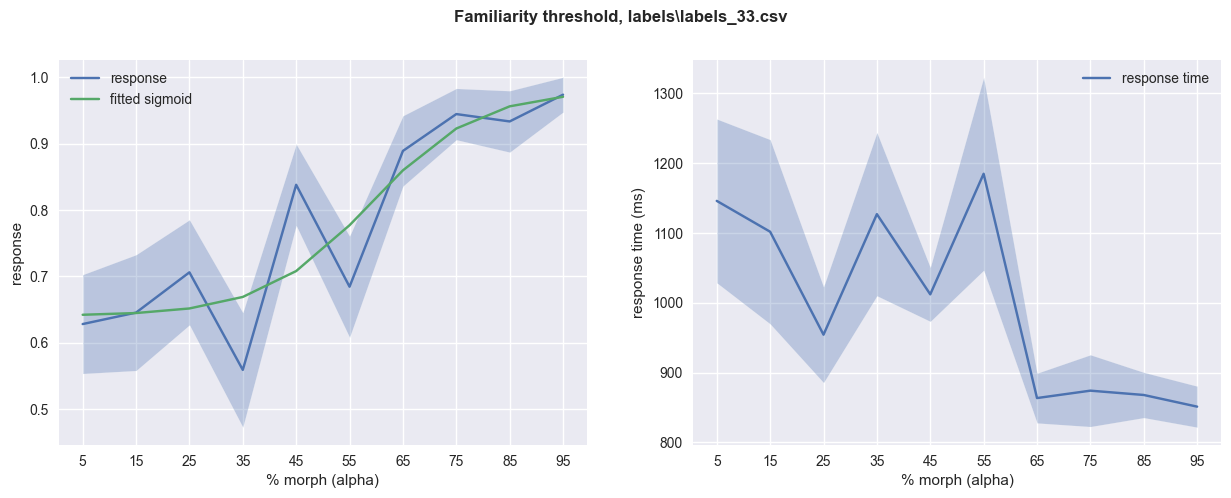

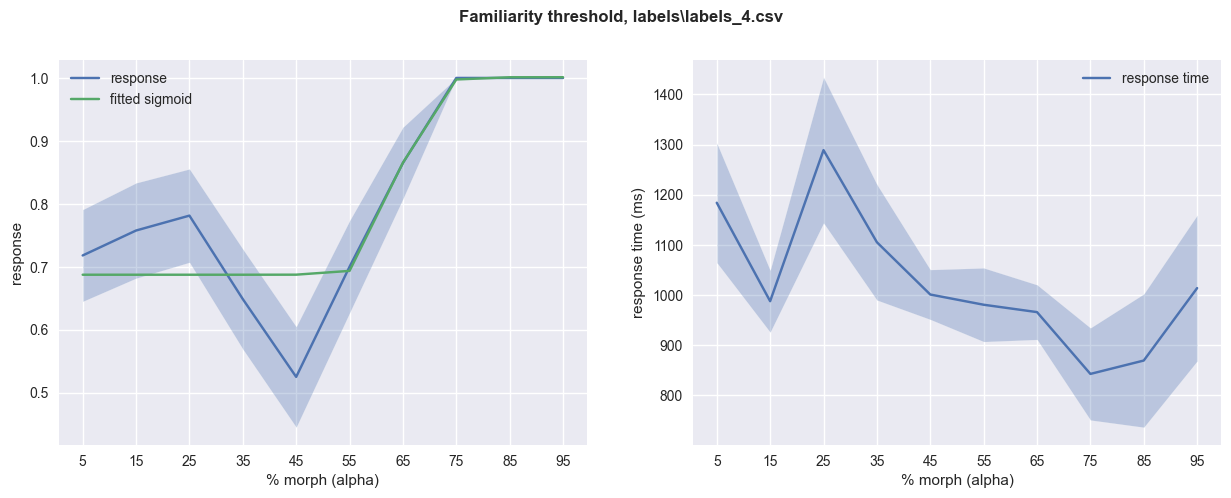

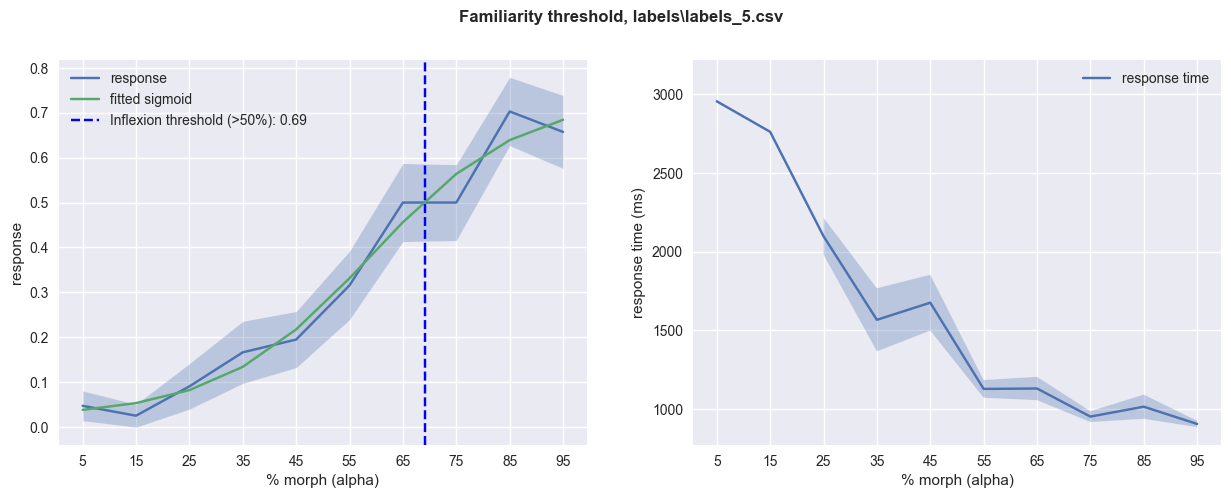

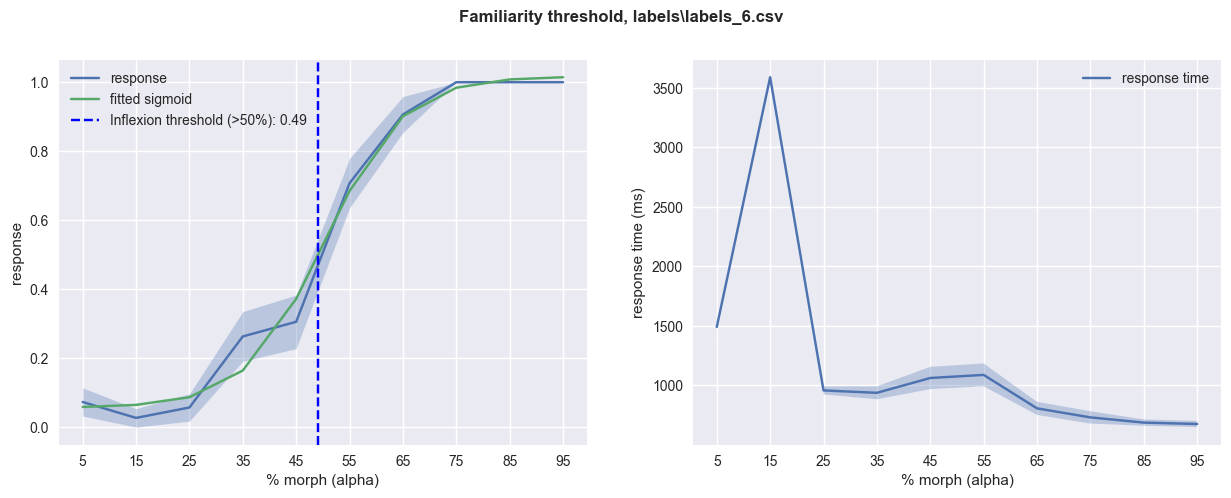

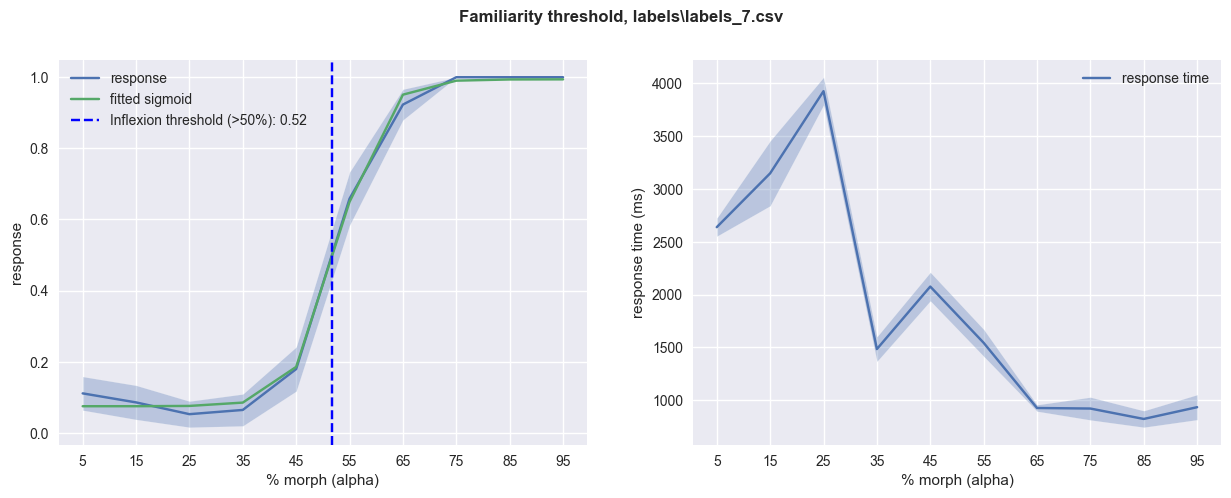

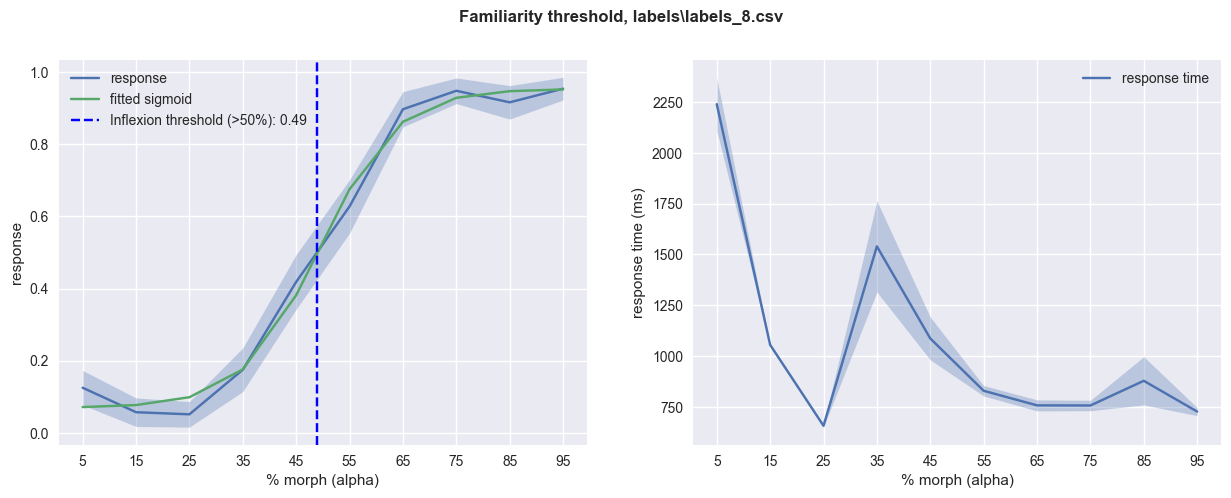

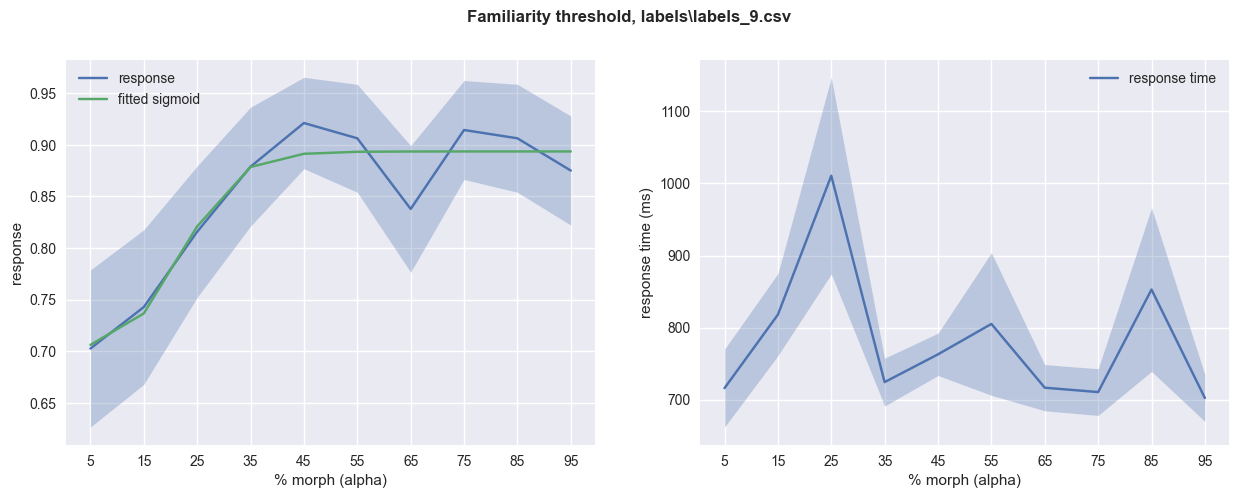

In [6]:
from glob import glob

inflexion_available = 0

params_fit = []

for label_file in sorted(glob("labels/*.csv")):
    df = pd.read_csv(label_file)

    cur_mean, cur_std = compute_morph_scores(df)
    try:
        params, fitted_curve = fit_sigmoid(cur_mean)
        inflexion_point = find_inflexion(fitted_curve)

        params_fit.append(params)
    except RuntimeError:
        fitted_curve = None
        inflexion_point = None

    if inflexion_point is not None:
        inflexion_available += 1

    plot_behavioral_data(cur_mean, cur_std,
                         sigmoid_curve=fitted_curve,
                         inflexion_point=inflexion_point,
                         title=f"Familiarity threshold, {label_file}")


params_fit = np.array(params_fit)

In [11]:
fitted_curve

array([0.07495822, 0.07502197, 0.07579837, 0.08515777, 0.18560012,
       0.64958326, 0.95093747, 0.99032006, 0.99370872, 0.99398784])

In [24]:

xinterp = np.linspace(0.05, 0.95, 1000)
xvals = np.linspace(0.05, 0.95, 10)
interpolated = np.interp(xinterp, xvals, fitted_curve)

xinterp[np.argwhere(np.diff(interpolated > 0.5))][0, 0]



np.float64(0.5175675675675675)

In [10]:
inflexion_available / len(glob("labels/*.csv"))

0.7272727272727273

In [10]:
params_fit

array([[  -0.28039686,    0.69171487,  -20.49715489,    0.99957289],
       [  -0.81671714,    0.60276446,  -24.73735752,    0.94220611],
       [  -0.85826116,    0.49102633,  -17.83179114,    0.92407723],
       [  -0.97520255,    0.52402045,  -13.42325499,    1.01172125],
       [  -0.92434444,    0.47083698,  -19.92321731,    1.00050282],
       [  -0.93861318,    0.50921816,  -21.29922098,    0.98636817],
       [  -0.97921558,    0.35066221,   -9.74629987,    0.97611944],
       [  -0.92297991,    0.52135135,  -17.24183515,    0.99917307],
       [  -0.6643418 ,    0.424222  ,  -13.94509317,    0.98412046],
       [  -0.93586845,    0.53708463,  -22.56621285,    1.00229961],
       [  -0.70961682,    0.49725182,   -6.49264328,    0.99198388],
       [  -0.69546521,    0.27391412,  -16.15937855,    0.97179116],
       [  -0.98827316,    0.59249555,  -17.50735915,    0.99922096],
       [  -0.40246265,    0.52660395,  -21.46814438,    0.65519969],
       [  -0.34134873,    0.600206

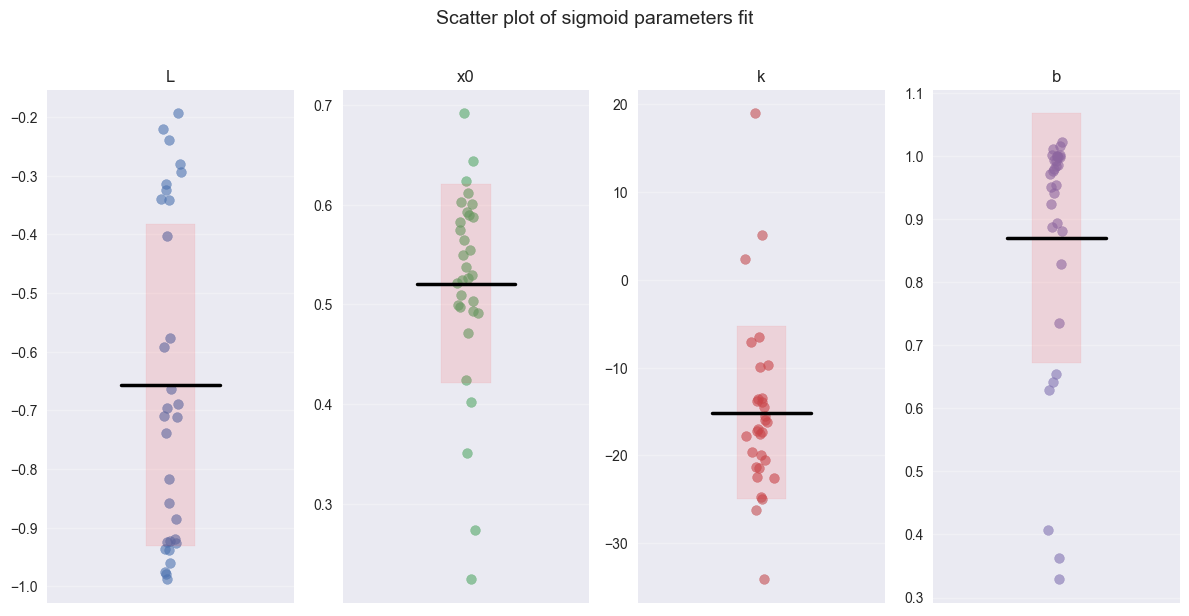

In [65]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["L", "x0", "k", "b"]

fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=False)

for i, ax in enumerate(axes):

    # clean display of values over 99th percentile
    displayed = params_fit[:, i]
    threshold = np.percentile(np.abs(displayed), 99)
    mask = np.abs(displayed) < threshold
    displayed = displayed[mask]

    N = displayed.shape[0]
    spread = np.ones(N) + np.random.normal(0, 0.02, N)
    ax.scatter(spread, displayed, alpha=0.6, s=50, color=f'C{i}')

    # Calculate mean and std
    mean = displayed.mean()
    std = displayed.std()

    # Plot mean line
    ax.plot([0.8, 1.2], [mean, mean], 'k-', linewidth=2.5)
    # Plot std deviation as error bars
    ax.fill_between([0.9, 1.1], mean - std, mean + std, alpha=0.1, color='red')

    ax.set_title(labels[i], fontsize=12)
    ax.set_xlim(0.5, 1.5)
    ax.set_xticks([])
    ax.grid(True, alpha=0.3, axis='y')

fig.suptitle('Scatter plot of sigmoid parameters fit', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()